# Proyek Analisis Data: [Bike Sharing Dataset]



*   **Nama**: Nayma Alaydia
*   **Email**: naymaalaydia@gmail.com
*   **ID Dicoding** : MC322D5X1087

# Menentukan Pertanyaan Bisnis

*   Bagaimana perbedaan jumlah penyewaan sepeda di setiap musim?
*   Sejauh mana kecepatan angin memengaruhi jumlah penyewaan sepeda pada hari kerja?
*   Apakah ada perbedaan jumlah penyewaan sepeda antara pengguna kasual dan pengguna terdaftar pada hari libur?




# Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Wrangling

# Gathering Data

In [3]:
!pip install kaggle
import os
import pandas as pd

# Assuming you have a Kaggle API token and have set up the Kaggle configuration
os.environ['KAGGLE_USERNAME'] = "your_kaggle_username" # replace with your kaggle username
os.environ['KAGGLE_KEY'] = "your_kaggle_api_key" # replace with your kaggle api key


# Download the dataset using the Kaggle API
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset --unzip --file day.csv

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
  0% 0.00/56.2k [00:00<?, ?B/s]
100% 56.2k/56.2k [00:00<00:00, 912kB/s]


In [4]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#Assesssing Data

Menilai tabel day_df

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Melihat Missing Data

In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Melihat Data Duplikasi

In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Analisis Deskriptif Data

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#Cleaning Data

Membersihkan tabel day_df

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Memperbaiki Tipe Data

In [10]:
datetime_columns = ["dteday"]
Bool_columns = ["workingday", "yr", "holiday"]
str_columns = ["weathersit", "season"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

for column in Bool_columns:
  day_df[column] = day_df[column].astype(bool)

for column in str_columns:
  day_df[column] = day_df[column].astype(str)

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    bool          
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    bool          
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    bool          
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: bool(3), datetime64[ns]

#Exploratory Data Analysis (EDA)

# Explore day_df

In [12]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731.000000,731,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,NaN,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3,True,NaN,False,NaN,True,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,NaN,710,NaN,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,6.519836,NaN,2.997264,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,4.000000,NaN,1.000000,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,7.000000,NaN,3.000000,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,10.000000,NaN,5.000000,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,12.000000,NaN,6.000000,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [13]:
day_df.groupby(by="season").cnt.sum()

,cnt
season,
1,471348
2,918589
3,1061129
4,841613


In [14]:
day_df.groupby(by="workingday").agg({
    "cnt": "nunique",
    "windspeed": ["max", "min", "mean", "std"]
})

cnt windspeed                              
           nunique       max       min      mean       std
workingday                                                
False          223  0.507463  0.042304  0.192628  0.078194
True           487  0.441563  0.022392  0.189497  0.077233

In [15]:
day_df.groupby(["holiday"])[["casual", "registered"]].count()

,casual,registered
holiday,,
False,710,710
True,21,21


In [16]:
days_df = day_df
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    bool          
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    bool          
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    bool          
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: bool(3), datetime64[ns]

#Visualization & Explanatory Analysis

# Pertanyaan 1

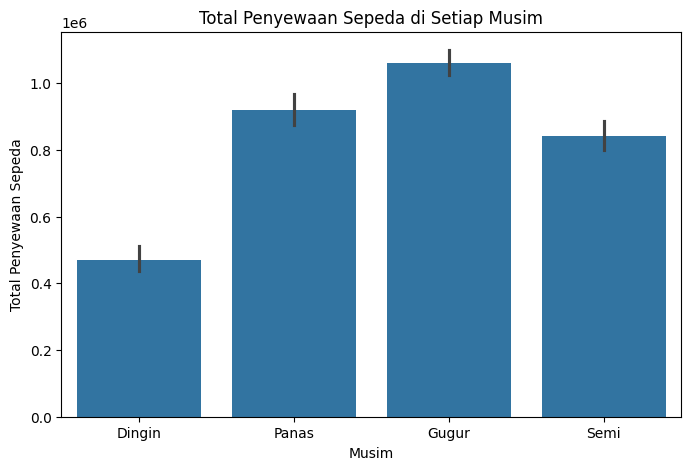

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x="season", y="cnt", data=day_df, estimator=sum)

plt.xticks(ticks=[0, 1, 2, 3], labels=["Dingin", "Panas", "Gugur", "Semi"])

plt.xlabel("Musim")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Total Penyewaan Sepeda di Setiap Musim")
plt.show()

Grafik tersebut menunjukkan perbedaan jumlah penyewaan sepeda di setiap musim. Penyewaan tertinggi terjadi pada musim gugur, diikuti oleh musim panas dan semi, sementara musim dingin memiliki jumlah penyewaan terendah. Hal ini menunjukkan bahwa cuaca memengaruhi minat pengguna dalam menyewa sepeda, di mana musim panas dan gugur lebih mendukung aktivitas luar ruangan dibandingkan musim dingin. Meskipun ada sedikit variasi, pola penyewaan tetap terlihat jelas.

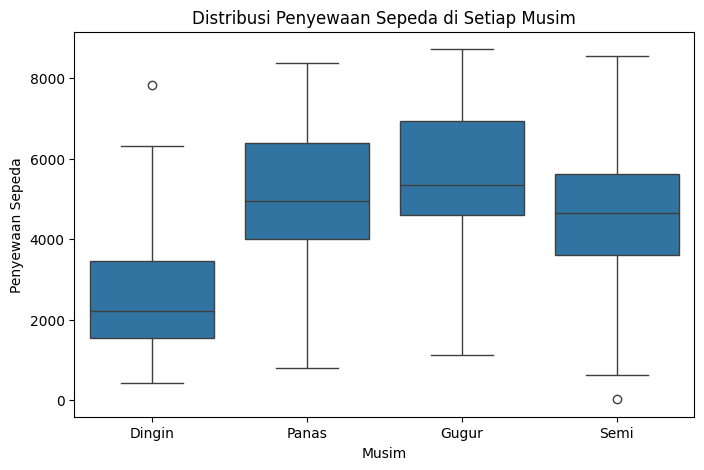

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x="season", y="cnt", data=day_df)

plt.xticks(ticks=[0, 1, 2, 3], labels=["Dingin", "Panas", "Gugur", "Semi"])
plt.xlabel("Musim")
plt.ylabel("Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda di Setiap Musim")
plt.show()

Grafik boxplot menunjukkan bahwa penyewaan sepeda bervariasi di setiap musim. Musim dingin memiliki jumlah penyewaan terendah dengan sebaran data yang lebih kecil, sementara musim gugur mencatat jumlah tertinggi dengan median yang lebih besar dibandingkan musim panas dan semi. Beberapa pencilan terlihat, terutama di musim dingin dan semi, yang menandakan adanya hari-hari dengan penyewaan yang berbeda dari pola umum. Secara keseluruhan, penyewaan sepeda lebih banyak terjadi pada musim panas dan gugur dibandingkan musim dingin.

# Pertanyaan 2

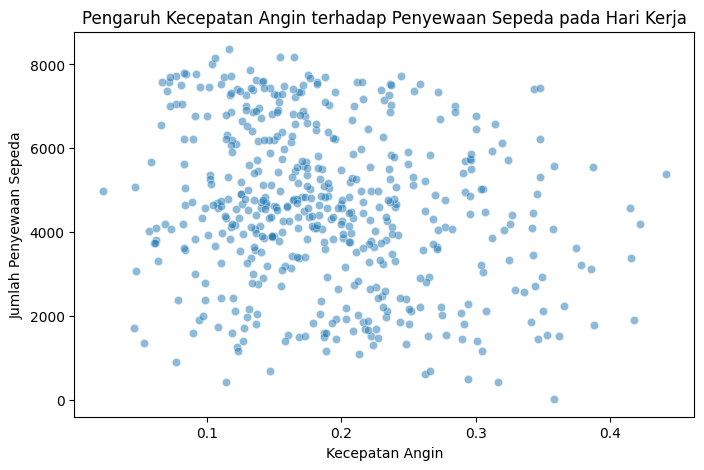

In [19]:
working_day_df = day_df[day_df['workingday'] == 1]

# Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x="windspeed", y="cnt", data=working_day_df, alpha=0.5)

plt.xlabel("Kecepatan Angin")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Pengaruh Kecepatan Angin terhadap Penyewaan Sepeda pada Hari Kerja")
plt.show()


Berdasarkan scatter plot di atas, kecepatan angin tidak memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda pada hari kerja. Yang ditunjukkan oleh titik-titik data yang tersebar secara acak tanpa pola yang jelas, hal ini menunjukkan bahwa peningkatan atau penurunan kecepatan angin tidak berkorelasi kuat dengan jumlah penyewaan sepeda. Dengan demikian, faktor lain kemungkinan lebih berperan dalam memengaruhi jumlah penyewaan sepeda dibandingkan kecepatan angin.

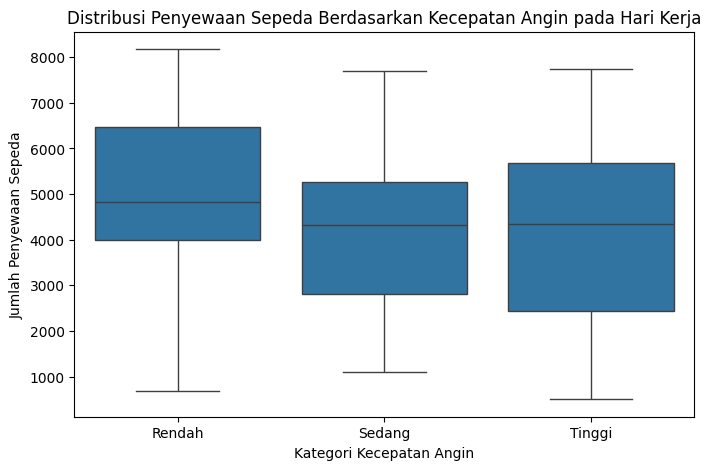

In [23]:
# Membuat kategori kecepatan angin
bins = [0.13, 0.18, 0.23, 0.30]
labels = ["Rendah", "Sedang", "Tinggi"]
working_day_df.loc[:, "wind_category"] = pd.cut(working_day_df["windspeed"], bins=bins, labels=labels).astype("category")

# Box plot
plt.figure(figsize=(8,5))
sns.boxplot(x="wind_category", y="cnt", data=working_day_df)

plt.xlabel("Kategori Kecepatan Angin")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kecepatan Angin pada Hari Kerja")
plt.show()

Boxplot di atas menunjukkan bahwa kecepatan angin tidak terlalu berpengaruh terhadap jumlah penyewaan sepeda pada hari kerja. Meskipun median penyewaan sedikit lebih tinggi saat kecepatan angin rendah, distribusi data di semua kategori kecepatan angin tetap mirip. Selain itu, variasi jumlah penyewaan cukup besar di setiap kategori, dengan adanya outlier yang tersebar. Hal ini menunjukkan bahwa fluktuasi penyewaan lebih dipengaruhi oleh faktor lain, bukan kecepatan angin.


# Pertanyaan 3

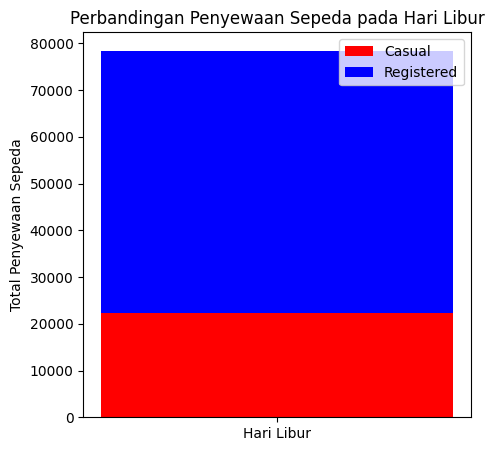

In [28]:
holiday_only = day_df[day_df["holiday"] == 1]

# Menghitung total penyewaan untuk hari libur
total_casual = holiday_only["casual"].sum()
total_registered = holiday_only["registered"].sum()

# Membuat Stacked Bar Chart
fig, ax = plt.subplots(figsize=(5, 5))
ax.bar("Hari Libur", total_casual, label="Casual", color="red")
ax.bar("Hari Libur", total_registered, bottom=total_casual, label="Registered", color="blue")

# Menambahkan label dan judul
ax.set_ylabel("Total Penyewaan Sepeda")
ax.set_title("Perbandingan Penyewaan Sepeda pada Hari Libur")
ax.legend()

# Menampilkan plot
plt.show()

Grafik di atas menunjukkan perbedaan yang signifikan dalam jumlah penyewaan sepeda antara pengguna kasual dan pengguna terdaftar pada hari libur. Mayoritas penyewaan dilakukan oleh pengguna terdaftar, yang ditunjukkan dengan warna biru. Sementara itu, pengguna kasual hanya menyumbang bagian kecil dari total penyewaan, meskipun ada peningkatan pada hari libur. Hal ini menunjukkan bahwa pengguna terdaftar lebih aktif dalam menyewa sepeda dibandingkan pengguna kasual.

<ipython-input-31-bfe770a2515e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="User Type", y="Total Penyewaan", data=violin_df, palette={"casual": "red", "registered": "blue"})


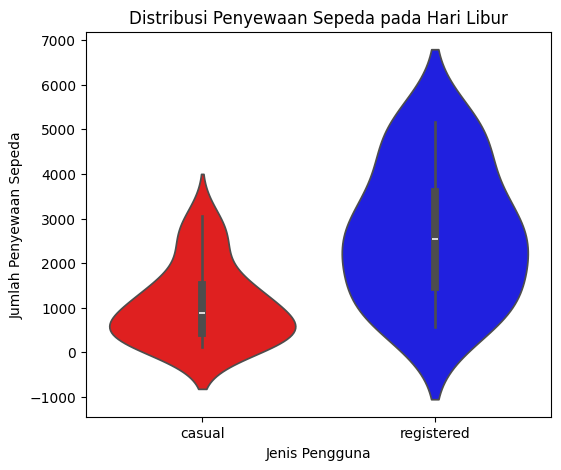

In [31]:
holiday_only = day_df[day_df["holiday"] == 1]

# Mengubah data ke dalam format yang sesuai untuk seaborn
violin_df = holiday_only.melt(id_vars=["holiday"], value_vars=["casual", "registered"],
                              var_name="User Type", value_name="Total Penyewaan")

# Membuat Violin Plot
plt.figure(figsize=(6, 5))
sns.violinplot(x="User Type", y="Total Penyewaan", data=violin_df, palette={"casual": "red", "registered": "blue"})

# Menambahkan judul dan label
plt.title("Distribusi Penyewaan Sepeda pada Hari Libur")
plt.xlabel("Jenis Pengguna")
plt.ylabel("Jumlah Penyewaan Sepeda")

# Menampilkan plot
plt.show()

Violin plot menunjukkan perbedaan yang jelas dalam jumlah penyewaan sepeda antara pengguna kasual dan pengguna terdaftar pada hari libur. Pengguna kasual umumnya menyewa dalam jumlah kecil, dengan mayoritas berada di kisaran 500 hingga 1500 penyewaan. Sebaliknya, pengguna terdaftar memiliki jumlah penyewaan yang lebih tinggi dan bervariasi, dengan puncaknya antara 2000 hingga 4000 penyewaan.  

Distribusi pengguna terdaftar lebih lebar, menunjukkan bahwa mereka lebih sering dan lebih banyak menyewa sepeda dibandingkan pengguna kasual. Sementara itu, pengguna kasual cenderung memiliki penyewaan yang lebih terbatas. Secara keseluruhan, pada hari libur, pengguna terdaftar lebih aktif dalam menyewa sepeda dibandingkan pengguna kasual.

In [32]:
days_df.to_csv("days_df.csv", index = False)